In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read data in
# confirmed.csv contains infection rates time series
confirmed = pd.read_csv('confirmed.csv', header='infer')
# unified.csv contains regional population information
unified = pd.read_csv('unified.csv', header='infer')

# extract the total population N for a county
N_Pima = int(unified[unified['Admin2'] == 'Pima']['Population'])

In [3]:
# extracting Arizona data
arizona = confirmed[confirmed['Province_State']=='Arizona']
arizona

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20
101,84004001,US,USA,840,4001.0,Apache,Arizona,US,35.394650,-109.489238,...,5036,5112,5217,5309,5347,5391,5392,5492,5548,5630
102,84004003,US,USA,840,4003.0,Cochise,Arizona,US,31.879347,-109.751609,...,3272,3350,3434,3529,3596,3639,3639,3781,3863,3954
103,84004005,US,USA,840,4005.0,Coconino,Arizona,US,35.838834,-111.770718,...,7114,7185,7229,7275,7446,7474,7520,7575,7644,7744
104,84004007,US,USA,840,4007.0,Gila,Arizona,US,33.801901,-110.813278,...,2689,2847,2881,2897,2913,2970,3003,3076,3117,3167
105,84004009,US,USA,840,4009.0,Graham,Arizona,US,32.931669,-109.888218,...,2008,2041,2117,2132,2158,2194,2215,2242,2256,2281
106,84004011,US,USA,840,4011.0,Greenlee,Arizona,US,33.214988,-109.240528,...,187,194,208,215,218,224,228,239,248,265
107,84004012,US,USA,840,4012.0,La Paz,Arizona,US,33.728542,-113.981003,...,755,789,788,825,828,867,867,883,902,921
108,84004013,US,USA,840,4013.0,Maricopa,Arizona,US,33.348359,-112.491815,...,194410,196849,198822,201340,203663,205332,205658,213121,215386,218935
109,84004015,US,USA,840,4015.0,Mohave,Arizona,US,35.704717,-113.757790,...,5808,5853,5968,6079,6156,6197,6199,6477,6608,6792
110,84004017,US,USA,840,4017.0,Navajo,Arizona,US,35.399771,-110.321898,...,7756,7815,7884,7976,8035,8118,8163,8283,8323,8423


In [4]:
# extracting Pima data
pima = arizona[arizona['Admin2']=='Pima']
maricopa = arizona[arizona['Admin2']=='Maricopa']
# extract time series portion
timeseries = list(pima)[11:]
I_pima = pima[timeseries].values[0]
I_mari = maricopa[timeseries].values[0]

T = len(I_pima)
I_pima

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     1,     1,     1,     1,     2,     2,
           4,     4,     5,     7,     8,    12,    17,    24,    42,
          49,    75,   102,   120,   153,   187,   202,   217,   237,
         280,   326,   372,   415,   415,   464,   512,   543,   591,
         622,   668,   685,   700,   760,   819,   856,   913,   941,
         963,   973,  1026,  1060,  1090,  1136,  1164,  1188,  1215,
        1241,  1267,  1300,  1326,  1346,  1379,  1425,  1465,  1520,
        1554,  1585,  1602,  1623,  1661,  1696,  1750,  1781,  1814,
        1825,  1888,  1903,  1944,  1974,  2002,  2027,  2046,  2075,
        2119,  2167,

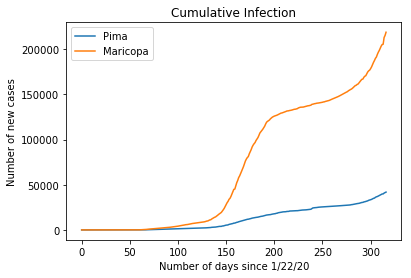

In [5]:
plt.plot(range(T), I_pima, label='Pima' )
plt.plot(range(T), I_mari, label='Maricopa')

plt.title('Cumulative Infection')
plt.ylabel('Number of new cases')
plt.xlabel('Number of days since '+timeseries[0])
plt.legend()
plt.show()

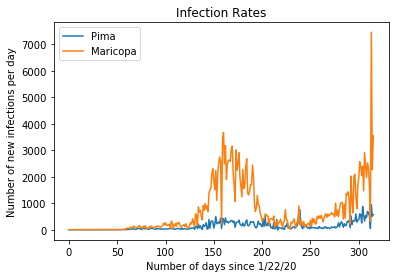

In [6]:
# Take pair-wise difference to see infection rate curve
d = lambda F: map(lambda t: F[t+1]-F[t], range(len(F)-1))
dI_pima = [I_pima[i+1]-I_pima[i] for i in range(T-1)]
dI_mari = [I_mari[i+1]-I_mari[i] for i in range(T-1)]
plt.plot(range(T-1), dI_pima, label='Pima')
plt.plot(range(T-1), dI_mari, label='Maricopa')
plt.title('Infection Rates')
plt.xlabel('Number of days since '+timeseries[0])
plt.ylabel('Number of new infections per day')
plt.legend()
plt.show()

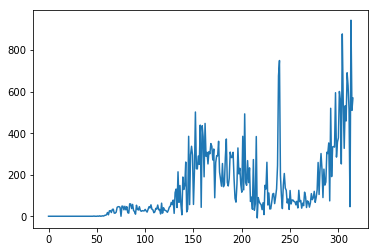

In [7]:
# Suppose
I = I_pima
dI = dI_pima
# get first non-zero entry
I0 = I[next((i for i, x in enumerate(I) if x), None)]
alpha = 0 # turn off for now
gamma = 0 # assumption

# Note: S_t is normalized by N_Pima
S = lambda t: float(N_Pima-I0)*np.prod([1-alpha-float(I[s])/N_Pima for s in range(t-1)])/N_Pima
S_pima = map(S, range(T))
# would like to find a way to write the following using map, or filter
dS_pima = [S_pima[i+1]-S_pima[i] for i in range(T-1)]


log_I_fun = lambda t: np.sum([np.log(1-gamma+S_pima[s]) for s in range(t-1)]) 
log_I = map(log_I_fun, range(T))
I_remade = map(lambda x: np.exp(x), log_I)



I_fun = lambda t: np.prod([1-gamma+S_pima[s] for s in range(t-1)])/N_Pima
I_recreated = map(I_fun, range(T))
I_recreated

# plt.plot(range(T), S_pima)
# plt.plot(range(T), 1-S_pima)
plt.plot(range(T-1), dI)
# plt.plot(range(T), I_recreated)
# plt.plot(range(T-1), 10000*dI/N_Pima)
# plt.plot(range(T), I)
# plt.show()


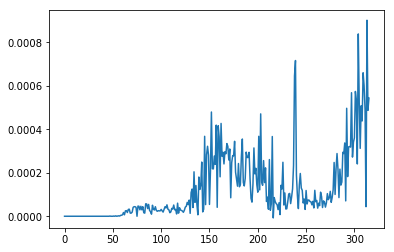

In [8]:
dI = [float(e)/N_Pima for e in dI]

plt.plot(range(T-1), dI)

In [9]:
S = lambda t: float(N_Pima-I0)*np.prod([1-alpha-float(I[s])/N_Pima for s in range(t-1)])/N_Pima
S_pima = map(S, range(T))

In [10]:
float(N_Pima-I0)/N_Pima

0.999999045144608

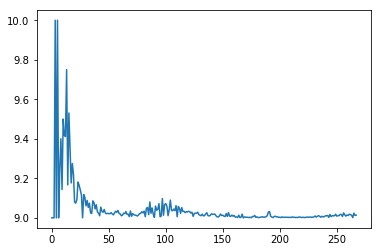

In [11]:
gamma = 9.0
S_potential = [float(I[t+1])/float(I[t])-1 + gamma for t in range(T-1) if I[t] > 0]
plt.plot(range(len(S_potential)), S_potential)

Text(0.5,1,'Number of Susceptible')

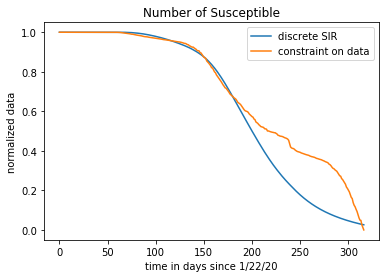

In [12]:
# recursion function
def S_rec(t):
    if t == 0:
        return 1
    else:
        return (1-float(I[t-1])/N_Pima+alpha)*S_rec(t-1)

results = [S(t) for t in range(T)]
plt.plot(range(T), results, label='discrete SIR')

alpha = 0
S_potential = [float(I[-1] - I[s] - alpha)/I[-1] for s in range(T)]
plt.plot(range(T), S_potential, label='constraint on data')
plt.legend()
plt.xlabel('time in days since '+timeseries[0])
plt.ylabel('normalized data')
plt.title('Number of Susceptible')

# set alpha = 0.1
# (N_Pima-I[s])*(1-alpha)

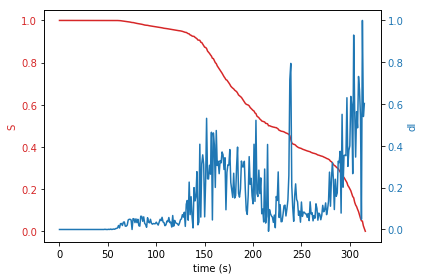

In [13]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('S', color=color)
ax1.plot(range(len(S_potential)), S_potential, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

maxdI = np.max(dI)
norm_dI = [float(e)/maxdI for e in dI]
color = 'tab:blue'
ax2.set_ylabel('dI', color=color)  # we already handled the x-label with ax1
ax2.plot(range(T-1), norm_dI, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

1.0
1.0
0.30000000000000004


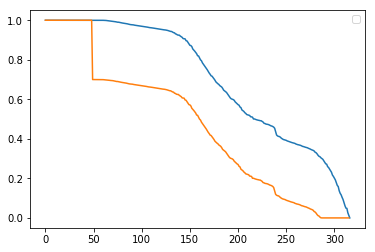

In [21]:
# the effect of the vaccine on the population
alpha = .3
# apply vaccine on day 150 and alpha % of the population gets immunized
dayV=50
S_v = S_potential[:dayV-1] + [ np.max([S_potential[t] - alpha, 0]) for t in range(T) if t >= dayV]
# plt.plot(range(T-1), norm_dI)
plt.plot(range(T), S_potential)
plt.plot(range(T-1), S_v)

I_v = map(lambda x: 1-x, S_v)
dI_v = np.array([I_v[s+1]-I_v[s] for s in range(T-2)])



# plt.plot(range(T), I_v)
# plt.plot(range(T-1), dI_v)
# plt.plot(range(T-1), norm_dI)
d = lambda F: map(lambda t: F[t+1]-F[t], range(len(F)-1))
dI_v = d(I_v)
# dI_v = dI_v[:dayV-1]+dI_v[dayV:] # remove singularity
maxdI_v = np.max(dI_v)

max_norm_dI = np.max(norm_dI)
print(max_norm_dI)
print(max_norm_dI)
gamma = maxdI_v/max_norm_dI
print(gamma)

dI_v = np.array([(1-gamma)*e/maxdI_v for e in dI_v]) # normalize and rescale

# plt.plot(range(T-2), gamma)
# plt.plot(range(T-2), dI_v, label='with vaccine')
# plt.plot(range(T-1), norm_dI, label='without vaccine')
plt.legend()

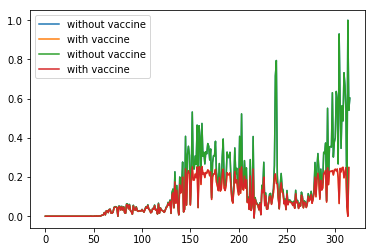

In [26]:
dayV = 250
alpha = 0.3
# Input Infection rates (alpha)
S_potential = [float(I[-1] - I[s])/I[-1] for s in range(T)]
S_v = S_potential[:dayV-1] + [ np.max([S_potential[t] - alpha, 0]) for t in range(T) if t >= dayV]
I_v = map(lambda x: 1-x, S_v)
dI_v = np.array([I_v[s+1]-I_v[s] for s in range(T-2)])
vaccined = np.array([norm_dI[s]*(1-np.abs(dI_v[s]-norm_dI[s])) for s in range(T-2)])
# minimize number of cumulativ infections (last entry of cumulative curve)
plt.plot(range(T-1), norm_dI, label='without vaccine')
plt.plot(range(T-2), vaccined, label='with vaccine')
plt.legend()

dayV = 50
alpha = 0.3
# Input Infection rates (alpha)
S_potential = [float(I[-1] - I[s])/I[-1] for s in range(T)]
S_v = S_potential[:dayV-1] + [ np.max([S_potential[t] - alpha, 0]) for t in range(T) if t >= dayV]
I_v = map(lambda x: 1-x, S_v)
dI_v = np.array([I_v[s+1]-I_v[s] for s in range(T-2)])
vaccined = np.array([norm_dI[s]*(1-np.abs(dI_v[s]-norm_dI[s])) for s in range(T-2)])


plt.plot(range(T-1), norm_dI, label='without vaccine')
plt.plot(range(T-2), vaccined, label='with vaccine')
plt.legend()
